In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
             'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class',]
df = pd.read_csv('magic04.data', names=col_names)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
df['class'] = pd.factorize(df['class'])[0]

train, valid, test splitting 60%, 20%, 20%

In [4]:
# int(len(df) * .6)
# int(len(df) * .8)

# df.sample(frac=1, random_state=1)

In [5]:
train, valid, test = np.split(df.sample(frac=1, random_state=1), [int(len(df) * .6), int(len(df) * .8)])

# train
# valid
# test

c:\Users\k26ra\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


scaling

In [6]:
np.array(
    [
        [[20, 21], [30, 31], [50, 51]],
        [[13, 14], [16, 17], [19, 20]]
    ]
).shape

(2, 3, 2)

In [7]:
# np.array([60, 70, 80, 90]).shape # 1d array
# np.array([[60], [70], [80], [90]]).shape # 2d array

# df['fLength']  # Series (1d)
# df[['fLength']]  # DataFrame (2d)

# df['fLength'].values  # 1d array
# df[['fLength']].values  # 2d array

In [8]:
# df.columns[:-1]
# df.columns[-1]

In [9]:
# X = df[df.columns[:-1]]
# y = df[df.columns[-1]]

# X  # feature matrix (pd.DataFrame)
# y  # target vector (pd.Series)

# X.values  # numpy 2d array
# y.values  # numpy 1d array

# random stuff below, MAGIC above

what exactly is **mapping** in programming?

In [10]:
prices = dict(
    mango=50,
    orange=100,
    kiwi=120,
    apple=90
)


def mapper(fruit):
  """ takes a fruit, returns the price of it """
  return prices[fruit]


shopping = ['apple', 'apple', 'orange', 'mango']
# i need this array: payment = [90, 90, 100, 50]

payment = []
for fruit in shopping:
  payment.append(mapper(fruit))

shopping
payment

['apple', 'apple', 'orange', 'mango']

[90, 90, 100, 50]

categorical values -> numerical values

**manual loop**

In [11]:
mapping = dict(g=1, h=2, w=3)


def mapper(letter):
  return mapping[letter]


array = np.array(['g', 'g', 'h', 'w', 'w'])

converted = []
for letter in array:
  converted.append(mapper(letter))

array
converted

array(['g', 'g', 'h', 'w', 'w'], dtype='<U1')

[1, 1, 2, 3, 3]

categorical values -> numerical values

**using vectorize**

In [12]:
mapping = dict(g=1, h=2, w=3)


def mapper(letter):
  return mapping[letter]


array = np.array(['g', 'g', 'h', 'w', 'w'])
converted = np.vectorize(mapper)(array)

array
converted

array(['g', 'g', 'h', 'w', 'w'], dtype='<U1')

array([1, 1, 2, 3, 3])

categorical values -> numerical values

**using bool mask** (works for binary categories only)

In [13]:
# g = 1, h = 0

array = np.array(['g', 'g', 'h'])
bool_mask = array == 'g'
converted = bool_mask.astype(int)

array
bool_mask
converted

array(['g', 'g', 'h'], dtype='<U1')

array([ True,  True, False])

array([1, 1, 0])

convert `class` col

g, h -> 1, 0

using **pd.factorize**

In [14]:
pd.factorize(df['class'])
pd.factorize(df['class'])[0]

(array([0, 0, 0, ..., 1, 1, 1]), Index([0, 1], dtype='int64'))

array([0, 0, 0, ..., 1, 1, 1])

convert `class` col

g, h -> 1, 0

using **bool mask**

In [15]:
np.array((df['class'] == 'g').astype(int))

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# df['class'] = (df['class'] == 'g').astype(int)

## how to make a df

```text
info:
name, age, weight, salary
vidu, 22, 60, 10000
rahul, 20, 65, 5000
vishnu, 10, 40, 100
paru, 15, 50, 2000
```

In [17]:
friends = [
    ['vidu', 22, 60, 10000],  # row
    ['rahul', 20, 65, 5000],
    ['vishnu', 10, 40, 100],
    ['paru', 15, 50, 2000],
]

friends[0][0]  # name of 0th row
friends[0][1]  # age of 0th row

'vidu'

22

In [18]:
friends = pd.DataFrame(
    [
        ['vidu', 22, 60, 10000],  # row
        ['rahul', 20, 65, 5000],
        ['vishnu', 10, 40, 100],
        ['paru', 15, 50, 2000],
    ],
    columns=['name', 'age', 'weight', 'salary']
)

friends['name']  # col vector
friends['age']  # col vector

0      vidu
1     rahul
2    vishnu
3      paru
Name: name, dtype: object

0    22
1    20
2    10
3    15
Name: age, dtype: int64

In [19]:
friends = pd.DataFrame(
    {
        'name': ['rahul', 'vidu'],  # col
        'age': [22, 20]
    }
)

friends['name']
friends['age']

0    rahul
1     vidu
Name: name, dtype: object

0    22
1    20
Name: age, dtype: int64

## scaling

In [20]:
pd.DataFrame(
    {
        'age': [16, 20, 22, 23, 120, 200, 10, 12, 15]
    }
).describe()

,age
count,9.000000
mean,48.666667
std,66.353221
min,10.000000
25%,15.000000
50%,20.000000
75%,23.000000
max,200.000000


In [21]:
# ages = np.array([25, 25, 35, 45, 45, 10, 15, 15, 20, 22])
ages = np.array([16, 20, 22, 23, 120, 200, 10, 12, 15])

var = ((ages - ages.mean()) ** 2).mean()
std_dev = var ** 0.5

var, std_dev
ages.var(), ages.std()

(np.float64(3913.5555555555566), np.float64(62.5584171439428))

(np.float64(3913.5555555555566), np.float64(62.5584171439428))

**standard scaling**

In [22]:
ages_scaled = (ages - ages.mean()) / std_dev

In [23]:
ages
ages_scaled

ages.mean(), ages.std()
ages_scaled.mean(), ages_scaled.std()  # mean = 0, std = 1

array([ 16,  20,  22,  23, 120, 200,  10,  12,  15])

array([-0.5221786 , -0.45823836, -0.42626824, -0.41028319,  1.14026755,
        2.41907229, -0.61808895, -0.58611884, -0.53816366])

(np.float64(48.666666666666664), np.float64(62.5584171439428))

(np.float64(3.700743415417188e-17), np.float64(0.9999999999999999))

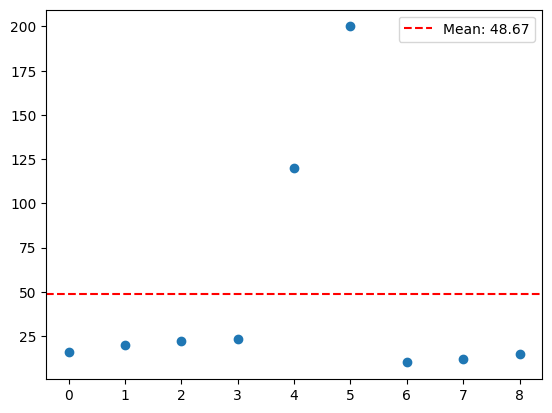

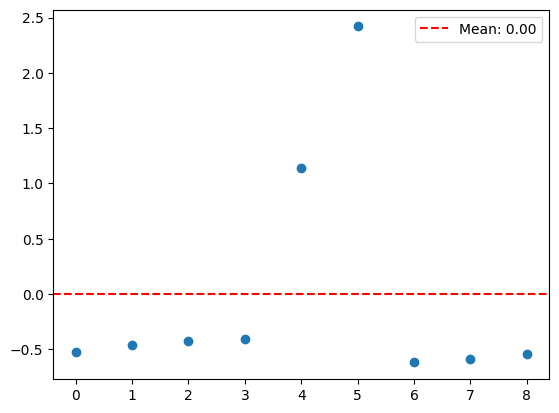

In [24]:
def scatter_ages():
  plt.scatter(range(len(ages)), ages)
  plt.axhline(y=ages.mean(), color='red', linestyle='--', label=f'Mean: {ages.mean():.2f}')
  plt.legend()
  plt.show()

  plt.scatter(range(len(ages_scaled)), ages_scaled)
  plt.axhline(y=ages_scaled.mean(), color='red', linestyle='--', label=f'Mean: {ages_scaled.mean():.2f}')
  plt.legend()
  plt.show()


scatter_ages()

**another example**

In [25]:
df = pd.DataFrame(
    [
        ['rahul', 20, 100000],
        ['vishnu', 10, 10],
        ['tejas', 1, 1000],
        ['vidu', 22, 20000],
    ],
    columns=['name', 'age', 'salary']
)

df
df.describe()

,name,age,salary
0,rahul,20,100000
1,vishnu,10,10
2,tejas,1,1000
3,vidu,22,20000


,age,salary
count,4.000000,4.000000
mean,13.250000,30252.500000
std,9.708244,47399.525578
min,1.000000,10.000000
25%,7.750000,752.500000
50%,15.000000,10500.000000
75%,20.500000,40000.000000
max,22.000000,100000.000000


In [26]:
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['salary'] = (df['salary'] - df['salary'].mean()) / df['salary'].std()

df
df.describe()

,name,age,salary
0,rahul,0.695285,1.471481
1,vishnu,-0.334767,-0.638034
2,tejas,-1.261814,-0.617148
3,vidu,0.901296,-0.216300


,age,salary
count,4.000000,4.000000e+00
mean,0.000000,6.938894e-18
std,1.000000,1.000000e+00
min,-1.261814,-6.380338e-01
25%,-0.566529,-6.223691e-01
50%,0.180259,-4.167236e-01
75%,0.746788,2.056455e-01
max,0.901296,1.471481e+00


## np.reshape, np.hstack

In [27]:
array = np.array(range(1, 25))  # 1d array with 24 elems

array.reshape((-1, 3))  # 2d array

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24]])

In [28]:
lst = [1, 2, 3, 4, 5]

np.std(lst)

np.float64(1.4142135623730951)

In [29]:
array = np.array([1, 2, 3, 4, 5])

array.std()  # population
array.std(ddof=1)  # sample

np.float64(1.4142135623730951)

np.float64(1.5811388300841898)

In [30]:
df = pd.DataFrame(
    {
        'numbers': [1, 2, 3, 4, 5]
    }
)

type(df)
type(df['numbers'])

df['numbers'].std()  # sample
df['numbers'].std(ddof=0)  # population

pandas.core.frame.DataFrame

pandas.core.series.Series

np.float64(1.5811388300841898)

np.float64(1.4142135623730951)

In [31]:
numbers = pd.Series([1, 2, 3, 4, 5])

numbers.std()  # sample
numbers.std(ddof=0)  # population

np.float64(1.5811388300841898)

np.float64(1.4142135623730951)

In [32]:
array = np.array([7, 7, 7, 7, 5, 1, 2, 1, 1, 3, 5, 5, 5, 5, 1, 1, 7, 7, 0, 9, 9, 9, 9])

In [33]:
freq = {}

for num in array:
  if num not in freq:
    freq[num] = 1
  else:
    freq[num] += 1

freq

{np.int64(7): 6,
 np.int64(5): 5,
 np.int64(1): 5,
 np.int64(2): 1,
 np.int64(3): 1,
 np.int64(0): 1,
 np.int64(9): 4}

In [34]:
mode_num = array[0]
mode_freq = 1
for num in freq:
  if freq[num] > mode_freq:
    mode_freq = freq[num]
    mode_num = num

mode_num

np.int64(7)

# sigmoid function

[-inf, inf] -> [0, 1]

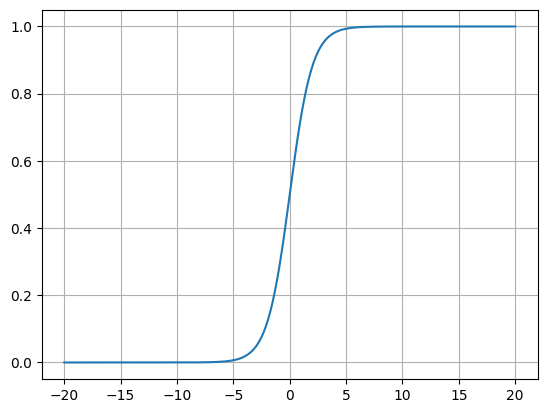

In [50]:
def sigmoid(x):
  return 1 / (1 + np.e ** -x)


x = np.linspace(-20, 20, 200)
y = np.vectorize(sigmoid)(x)

plt.plot(x, y)
plt.grid()